# Stock Market Analysis for Tech Giants
In this project, we will analyze data from Yahoo Finance of three of the popular tech stocks to date.

We will use Pandas to extract and analyze information, visulaize it, analyze risks based of it's performance history.

Here are questions we will try to answer:
-  What was the change of price over time?
-  What was the daily return on average of a stock?
-  What was the moving average of various stock?
-  What is the correlation between daily returns of different stock?
-  How much value do we put at risk by investing in a stock?
-  How can we attempt to predict future stock behavior?

In [94]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

Let us now create a future lists of stock names for future looping.

In [62]:
#We are going to analyze the top three tech giants.
tg_list = ['AAPL','MSFT','GOOG']

In [63]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [64]:
#using yahoo finance to grab crytocurrency data
for tg in tg_list:
    globals()[tg] = pdr.DataReader(tg,'yahoo',start,end)

In [65]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-09,117.949997,119.430000,117.940002,118.989998,117.106812,33561900
2017-01-10,118.769997,119.379997,118.300003,119.110001,117.224907,24462100
2017-01-11,118.739998,119.930000,118.599998,119.750000,117.854782,27588600
2017-01-12,118.900002,119.300003,118.209999,119.250000,117.362694,27086200
2017-01-13,119.110001,119.620003,118.809998,119.040001,117.156021,26111900


In [66]:
#STATISTICS FOR APPLE'S STOCK
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,151.521304,152.495731,150.562451,151.633097,150.629891,2.704411e+07
std,14.417609,14.510374,14.181878,14.330001,14.895138,1.127279e+07
min,117.949997,119.300003,117.940002,118.989998,117.106812,1.402670e+07
25%,142.940002,143.880005,142.199997,142.729996,141.515030,2.034630e+07
50%,153.419998,153.990005,152.220001,153.179993,152.034271,2.436150e+07
75%,160.139999,161.270004,159.110001,160.470001,159.855331,2.951690e+07
max,175.110001,177.199997,174.860001,176.419998,176.419998,1.119850e+08


In [67]:
#INFORMATION ABOUT APPLE DATAFRAME
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-01-09 to 2018-01-09
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


## What is the change in stock's price over time?

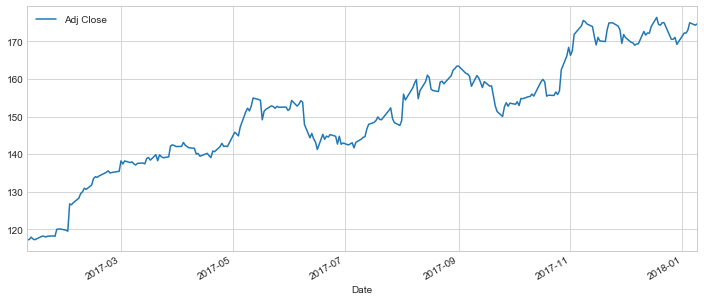

In [68]:
#Using pandas we canplot the stocks adjusted closing price
AAPL['Adj Close'].plot(legend = True, figsize=(12,5))

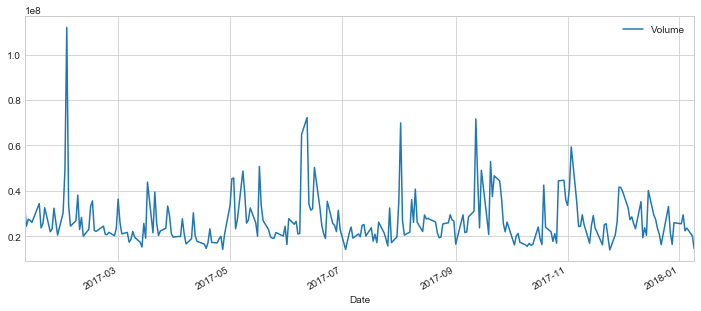

In [69]:
#Using pandas once more to plot the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

## What was the moving average of the stocks?

In [70]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [71]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2018-01-03,172.529999,174.550003,171.960007,172.229996,172.229996,29517900,172.487999,172.073499,170.407751
2018-01-04,172.539993,173.470001,172.080002,173.029999,173.029999,22434600,172.337000,172.242999,170.756139
2018-01-05,173.440002,175.369995,173.050003,175.000000,175.000000,23660000,172.401999,172.542500,171.125394
2018-01-08,174.350006,175.610001,173.929993,174.350006,174.350006,20225300,172.336000,172.794000,171.495399
2018-01-09,174.550003,175.059998,173.410004,174.673599,174.673599,14576610,172.302361,173.059180,171.851948


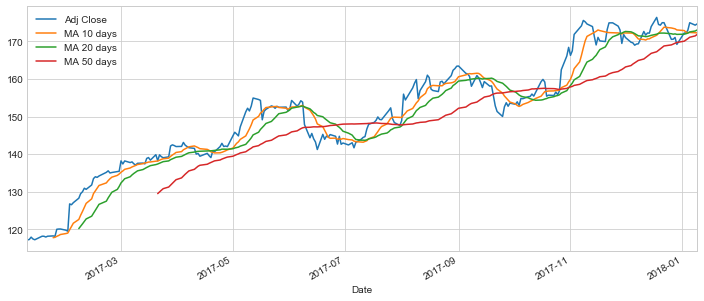

In [72]:
AAPL[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(figsize=(12,5))

Genereally some casual dips in July and October but overall an upward trend.

## What was the daily return average of a stock?

In [73]:
#In order calculate daily return we can use the percentage change of the adjusted closing price

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].tail()

Date
2018-01-03   -0.000174
2018-01-04    0.004645
2018-01-05    0.011385
2018-01-08   -0.003714
2018-01-09    0.001856
Name: Daily Return, dtype: float64

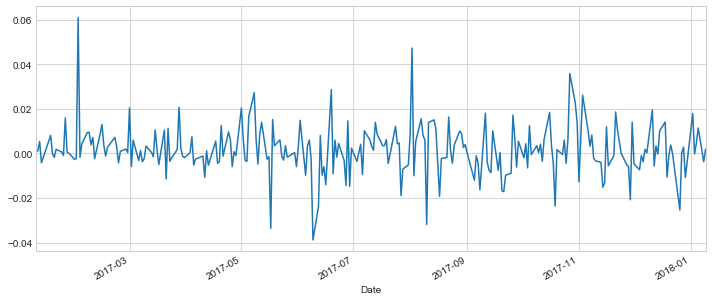

In [74]:
#Let us now plot the daily return
AAPL['Daily Return'].plot(figsize=(12,5))

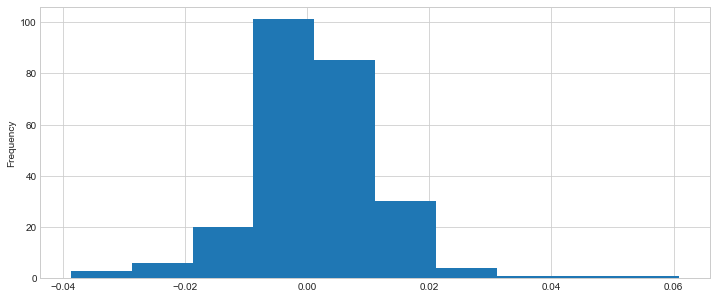

In [75]:
AAPL['Daily Return'].plot(kind='hist',figsize=(12,5))

Positive daily returns seem to be more frequent than negative returns.

## What was the correlation between daily returns of different stocks?

In [77]:
#Let's read the 'Adj Close' column from all the tech giants

close_df = pdr.DataReader(tg_list,'yahoo',start,end)['Adj Close']

In [78]:
close_df.tail()

,AAPL,GOOG,MSFT
Date,,,
2017-01-13,117.156021,807.880005,61.330570
2017-01-12,117.362694,806.359985,61.242535
2017-01-11,117.854782,807.909973,61.809868
2017-01-10,117.224907,804.789978,61.252316
2017-01-09,117.106812,806.650024,61.271881


In [79]:
#Let's explore the returns again using the percentage change from the adj close.
returns_df = close_df.pct_change()

In [80]:
returns_df.tail()

,AAPL,GOOG,MSFT
Date,,,
2017-01-13,-0.008000,0.004064,0.002719
2017-01-12,0.001764,-0.001881,-0.001435
2017-01-11,0.004193,0.001922,0.009264
2017-01-10,-0.005345,-0.003862,-0.009020
2017-01-09,-0.001007,0.002311,0.000319


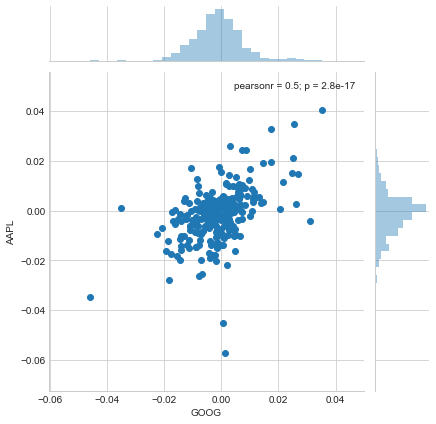

In [81]:
#We can now try to find the correlation between Apple and Google
sns.jointplot('GOOG','AAPL',returns_df,kind='scatter')

There seems to be a minor positive correlation between the two, the pearsonr correlation coefficient value of 0.5 agrees with that statement.

Let's use a pairplot to visualize all the tech giants in one view.

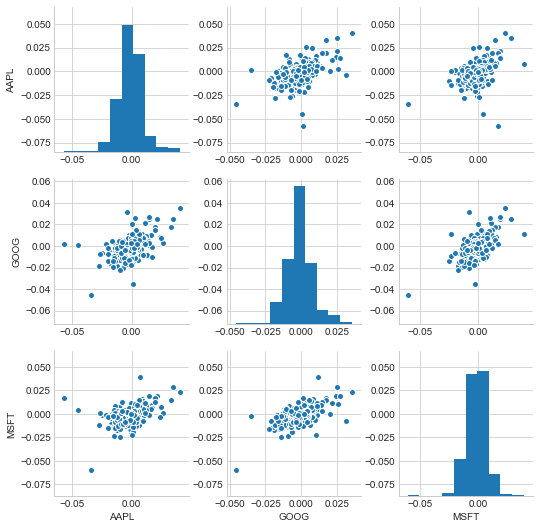

In [82]:
sns.pairplot(returns_df.dropna())

Quick and easy way to view correlations but let's use a correlation plot to see the actual numbers.

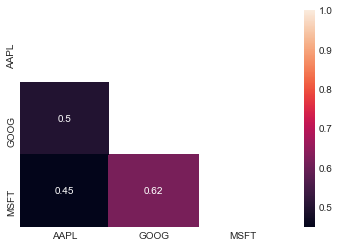

In [95]:
corr = returns_df.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True,mask=mask)